In [26]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.figure_factory as ff
import dash

from dash import dcc, html
from dash.dependencies import Input, Output

In [2]:
gunsbystate = pd.read_csv('firearm_data_cleaned_new.txt')
gunsbystate

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change
0,2014,AK,19.2,145,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2015,AK,23.4,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,4.2,0.0
2,2016,AK,23.3,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,-0.1,0.0
3,2017,AK,24.5,180,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,1.2,0.0
4,2018,AK,21.0,155,Alaska,11,18,7,25,9,...,0,0,0,0,0,0,0,0,-3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2019,WY,22.3,133,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,0.8,-1.0
498,2020,WY,25.9,154,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,3.6,0.0
499,2021,WY,26.1,155,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,0.2,0.0
500,2022,WY,20.4,124,Wyoming,8,16,8,24,10,...,0,0,0,0,0,0,0,-1,-5.7,0.0


In [ ]:
# Policy regime classification (structural analog to city/county)
gunsbystate["law_regime"] = pd.qcut(
    gunsbystate["law_strength_score"],
    q=3,
    labels=["Weak Laws", "Moderate Laws", "Strong Laws"]
)

gunsbystate = gunsbystate.apply(lambda x: x.round(2) if x.dtype == "float64" else x)
gunsbystate = gunsbystate.sort_values(by=["law_regime", "state", "year"])

gunsbystate


,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change,law_strength_per_death_rate,death_rate_change,law_regime
0,2014,AK,19.2,145,Alaska,11,18,7,25,9,...,0,0,0,0,0,NaN,NaN,0.57,NaN,Weak Laws
1,2015,AK,23.4,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,4.2,0.0,0.47,4.2,Weak Laws
2,2016,AK,23.3,177,Alaska,11,18,7,25,9,...,0,0,0,0,0,-0.1,0.0,0.47,-0.1,Weak Laws
3,2017,AK,24.5,180,Alaska,11,18,7,25,9,...,0,0,0,0,0,1.2,0.0,0.45,1.2,Weak Laws
4,2018,AK,21.0,155,Alaska,11,18,7,25,9,...,0,0,0,0,0,-3.5,0.0,0.52,-3.5,Weak Laws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2019,WA,10.7,842,Washington,32,40,8,48,14,...,0,1,3,0,0,0.3,10.0,2.99,0.3,Strong Laws
468,2020,WA,10.9,864,Washington,33,41,8,49,14,...,0,1,3,0,0,0.2,1.0,3.03,0.2,Strong Laws
469,2021,WA,11.2,896,Washington,33,41,8,49,14,...,0,1,3,0,0,0.3,0.0,2.95,0.3,Strong Laws
470,2022,WA,12.4,1022,Washington,35,43,8,51,14,...,0,1,4,0,0,1.2,2.0,2.82,1.2,Strong Laws


/var/folders/61/c554k7vn5rqgh6fl8m5pmlqh0000gn/T/ipykernel_3829/609523323.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



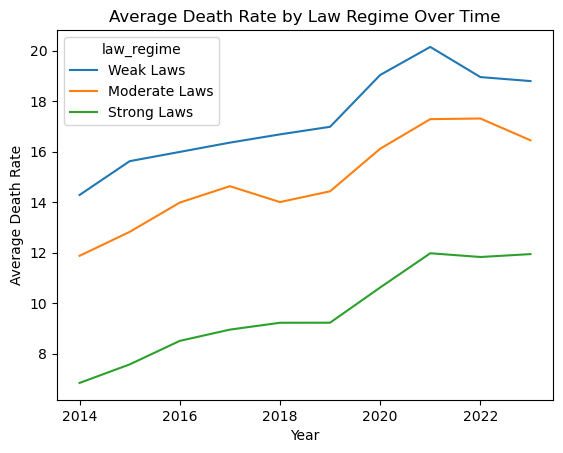

In [42]:
gunsbystate.groupby(["year", "law_regime"])["rate"].mean().unstack().plot()

plt.xlabel("Year")
plt.ylabel("Average Death Rate")
plt.title("Average Death Rate by Law Regime Over Time")
plt.show()


In [44]:
# Laws over time
mod_laws = smf.ols("law_strength_score ~ year", data=gunsbystate).fit()
print(mod_laws.summary())

                            OLS Regression Results                            
Dep. Variable:     law_strength_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.076
Date:                Tue, 09 Dec 2025   Prob (F-statistic):             0.0801
Time:                        17:11:25   Log-Likelihood:                -2020.9
No. Observations:                 502   AIC:                             4046.
Df Residuals:                     500   BIC:                             4054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -724.0825    425.236     -1.703      0.0

In [ ]:
# which states have the strongest, moderate, and weakest gun laws overall?
strongest_laws_overall = gunsbystate.nlargest(5, "law_strength_score")
moderate_laws_overall = gunsbystate.sort_values("law_strength_score").iloc[22:27]
weakest_laws_overall = gunsbystate.nsmallest(5, "law_strength_score")

In [32]:
strongest_laws_overall

# Over the last 5 years, California has the strongest gun laws

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change,law_strength_per_death_rate,death_rate_change,law_regime
49,2023,CA,8.0,3209,California,68,77,9,86,18,...,5,4,3,0,0,-0.6,1.0,8.50,-0.6,Strong Laws
46,2020,CA,8.5,3449,California,67,75,8,83,18,...,5,4,2,0,0,1.3,1.0,7.88,1.3,Strong Laws
47,2021,CA,9.0,3576,California,67,75,8,83,18,...,5,4,2,0,0,0.5,0.0,7.44,0.5,Strong Laws
48,2022,CA,8.6,3484,California,67,76,9,85,18,...,5,4,3,0,0,-0.4,0.0,7.79,-0.4,Strong Laws
45,2019,CA,7.2,2945,California,66,74,8,82,18,...,5,4,1,0,0,-0.3,2.0,9.17,-0.3,Strong Laws


In [33]:
moderate_laws_overall

# Over the last 5 years, Kansas has moderate gun laws

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change,law_strength_per_death_rate,death_rate_change,law_regime
248,2020,MS,28.6,818,Mississippi,8,17,9,26,9,...,0,0,0,0,0,4.4,0.0,0.28,4.4,Weak Laws
157,2019,KS,13.7,403,Kansas,8,15,7,22,9,...,0,0,0,0,0,-1.1,0.0,0.58,-1.1,Weak Laws
158,2020,KS,16.9,494,Kansas,8,15,7,22,9,...,0,0,0,0,0,3.2,0.0,0.47,3.2,Weak Laws
159,2021,KS,17.3,503,Kansas,8,15,7,22,9,...,0,0,0,0,0,0.4,0.0,0.46,0.4,Weak Laws
160,2022,KS,16.8,492,Kansas,8,15,7,22,9,...,0,0,0,0,0,-0.5,0.0,0.48,-0.5,Weak Laws


In [34]:
weakest_laws_overall

# Over the last 10 years, Montana has the weakest gun laws

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,...,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change,law_strength_per_death_rate,death_rate_change,law_regime
259,2021,MT,25.1,280,Montana,6,13,7,20,9,...,0,0,0,0,0,4.2,-1.0,0.24,4.2,Weak Laws
260,2022,MT,23.9,274,Montana,6,13,7,20,9,...,0,0,0,0,0,-1.2,0.0,0.25,-1.2,Weak Laws
261,2023,MT,21.5,247,Montana,6,13,7,20,9,...,0,0,0,0,0,-2.4,0.0,0.28,-2.4,Weak Laws
402,2014,SD,10.3,89,South Dakota,6,12,6,18,9,...,0,0,0,0,-1,NaN,NaN,0.58,NaN,Weak Laws
403,2015,SD,11.1,96,South Dakota,6,12,6,18,9,...,0,0,0,0,-1,0.8,0.0,0.54,0.8,Weak Laws


In [ ]:
# Time series gun law strength by state
fig = px.choropleth(
    gun,
    locations="state", 
    locationmode="USA-states",
    color="law_strength_score",
    animation_frame="year",
    scope="usa",
    color_continuous_scale="Viridis",
    labels={"law_strength_score": "Gun Law Strength Score"},
    title="Gun Law Strength by State Over Time (2014–2023)"
)

fig.show()


#### Observation
This animation represents a choropleth map of gun law strength scores by state from 2014 to 2023. This provides a visual comparison of how gun laws have evolved spatially and temporally, highlighting both policy divergence across states and changes within states over time. California has consistently implemented restrictive gun laws between 2014 and 2023, while South Dakota has consistently had permissive laws between that time.

In [ ]:
# Law strength change x death rate change
model = smf.ols(
    "death_rate_change ~ law_strength_change + year",
    data=gunsbystate
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      death_rate_change   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.559
Date:                Tue, 09 Dec 2025   Prob (F-statistic):             0.0293
Time:                        16:50:06   Log-Likelihood:                -859.51
No. Observations:                 451   AIC:                             1725.
Df Residuals:                     448   BIC:                             1737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              94.0713    

In [46]:
# gun law strength x death rates
fig = px.choropleth(
    gunsbystate,
    locations="state",
    locationmode="USA-states",
    color="rate",
    animation_frame="year",
    scope="usa",
    hover_name="state_name",
    hover_data={
        "rate": True,
        "deaths": True,
        "law_strength_score": True
    },
    color_continuous_scale="Viridis",
    title="Gun Death Rates by State Over Time"
)

fig.show()


#### Observation
This animation represents a choropleth map of gun deaths rates by state from 2014 to 2023. Its purpose is to visualize the spatial and temporal distribution of firearm harm in the U.S. showing where gun deaths are concentrated and how those patterns change over time based on gun law strengths. Despite not having the strongest laws over time, New York has consistently had the lowest gun death rate for this period of time, while the highest has been share between Alaska and Mississippi.